<div class="alert alert-block alert-info"> 📌 This notebook is about a regression project on a car price dataset. The dataset
include about 100000 secondhand cars in United Kingdom. Our goal in this project is estimating a car price based on some features of the car like mileage,enginesize,tax, etc.</div>

<b>Importing some libraries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
from scipy import stats
from scipy.stats import norm
import plotly.express as px
import category_encoders as ce
from sklearn import preprocessing,metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,explained_variance_score,mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

<p style="background:pink">
<code style="background:pink;color:black">I loaded each file sepreatly then I concatenated them and make one dataframe with all brands.
</code>
</p>

In [2]:
df_audi = pd.read_csv("D:/Dataset/UK_cars/audi.csv")
df_bmw = pd.read_csv("D:/Dataset/UK_cars/bmw.csv")
df_benz = pd.read_csv("D:/Dataset/UK_cars/benz.csv")
df_ford = pd.read_csv("D:/Dataset/UK_cars/ford.csv")
df_hyundi = pd.read_csv("D:/Dataset/UK_cars/hyundi.csv")
df_skoda = pd.read_csv("D:/Dataset/UK_cars/skoda.csv")
df_toyota = pd.read_csv("D:/Dataset/UK_cars/toyota.csv")
df_vauxhall = pd.read_csv("D:/Dataset/UK_cars/vauxhall.csv")
df_vw = pd.read_csv("D:/Dataset/UK_cars/vw.csv")

In [3]:
df_list = [df_audi,df_bmw,df_benz,df_ford,df_hyundi,df_skoda,df_toyota,df_vauxhall,df_vw]

In [4]:
df_name = ["audi","bmw","benz","ford","hyundi","skoda","toyota","vauxhall","vw"]

### Adding company name as a feature to dataset:

In [5]:
i=0
for df1 in df_list:
    df1["company"] = df_name[i]
    i = i+1

In [6]:
data = pd.concat([df_audi,df_bmw,df_benz,df_ford,df_hyundi,df_skoda,df_toyota,df_vauxhall,df_vw],axis=0)

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
company         0
dtype: int64

<p style="background:yellow">
<code style="background:yellow;color:black">You can see some statistics information about our dataset in below:
</code>
</p>

In [9]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


### Data:

In [10]:
data.head(-5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
15147,Eos,2008,4995,Manual,65000,Diesel,195,48.0,2.0,vw
15148,Eos,2008,3695,Automatic,127000,Petrol,280,34.5,2.0,vw
15149,Eos,2015,12495,Manual,41850,Diesel,125,58.9,2.0,vw
15150,Eos,2014,8950,Manual,58000,Diesel,125,58.9,2.0,vw


<h4>Average of each feature group by transmission type:</h4>

In [11]:
data.groupby("transmission").mean()

,year,price,mileage,tax,mpg,engineSize
transmission,,,,,,
Automatic,2017.053849,21558.217790,23904.736388,133.564270,55.243468,1.982713
Manual,2016.831500,12112.063991,25006.352502,109.061830,56.671169,1.417601
Other,2017.333333,16219.111111,16974.666667,111.111111,55.677778,1.355556
Semi-Auto,2017.755347,24284.031309,17465.925475,136.544516,51.354399,1.992406


<h4>Average of each feature group by company name:</h4>
<p>For example you can realize from the below table that highest average price belongs to audi company,
and bmw company has the highest amount of tax, also bmw cars have the most enginesize among the cars in this dataset. </p>

In [12]:
data.groupby("company").mean()

,year,price,mileage,tax,mpg,engineSize
company,,,,,,
audi,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
benz,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
bmw,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
ford,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
hyundi,2017.107613,12750.131070,21486.049588,121.147119,53.827798,1.457922
skoda,2017.502314,14275.449338,20118.452050,117.407053,56.589165,1.433509
toyota,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
vauxhall,2016.958553,10406.457893,23499.298636,128.766872,51.535007,1.417232
vw,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693


<h4>Average of each feature group by fuelType:</h4>
<p>Cars with diesel and hybrid fuel_type nearly have the same average price, about 19300$</p>

In [13]:
data.groupby("fuelType").mean()

,year,price,mileage,tax,mpg,engineSize
fuelType,,,,,,
Diesel,2016.890564,19339.488516,28815.987954,114.534548,58.226058,1.995915
Electric,2015.833333,16645.333333,21360.666667,22.500000,297.066667,1.066667
Hybrid,2017.157570,19289.586095,23495.500975,72.134503,89.052729,1.768389
Other,2017.400810,17443.344130,21243.736842,103.805668,85.606883,1.508502
Petrol,2017.229446,14775.045660,18753.081306,127.379570,50.825157,1.410299


In [14]:
data.hvplot.hist(by='Price', subplots=False, width=1000)

:NdOverlay   [Element]
   :Histogram   [engineSize]   (engineSize_count)

<h4>Price is our target!</h4>
<p>Average price is about 16800$,The most expensive car is 159,999$ !</p>

In [15]:
data['price'].describe()

count     99187.000000
mean      16805.347656
std        9866.773417
min         450.000000
25%        9999.000000
50%       14495.000000
75%       20870.000000
max      159999.000000
Name: price, dtype: float64

In [68]:
data['tax'].describe()

count    73160.000000
mean       118.678650
std         57.769296
min          0.000000
25%        125.000000
50%        145.000000
75%        145.000000
max        270.000000
Name: tax, dtype: float64

In [16]:
data.hvplot.hist("price")

:Histogram   [price]   (price_count)

<h4>Scatter plot of mileage and price:</h4>


In [17]:
data.hvplot.scatter(x='mileage', y='price')

:Scatter   [mileage]   (price)

<h4>Counting each model of bmw,benz,toyota company:</h4>


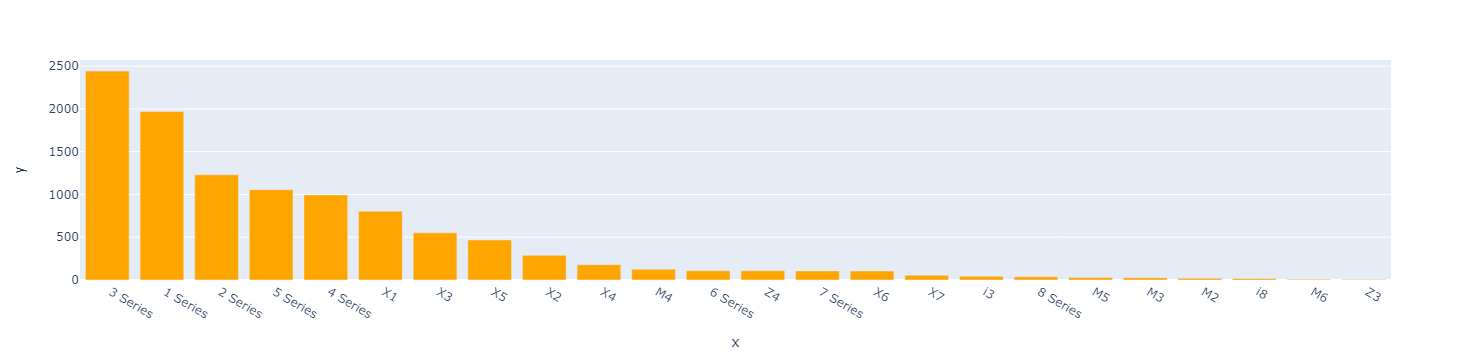

In [18]:
bmw_counts = df_bmw['model'].value_counts()
fig = px.bar(x=bmw_counts.index, y=bmw_counts.values,
            color_discrete_sequence=["orange"]
            )
fig.show()

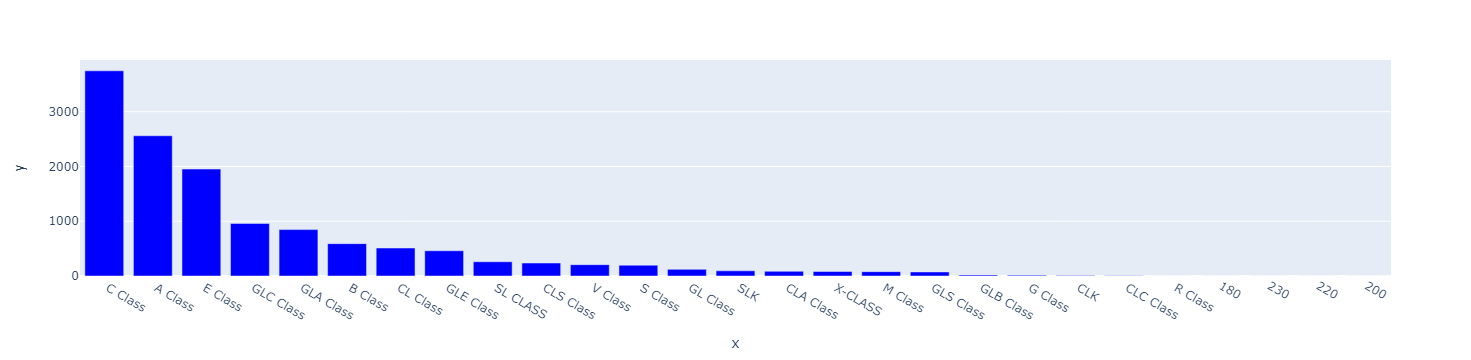

In [19]:
benz_counts = df_benz['model'].value_counts()
fig = px.bar(x=benz_counts.index, y=benz_counts.values,
            color_discrete_sequence=["blue"]
            )
fig.show()

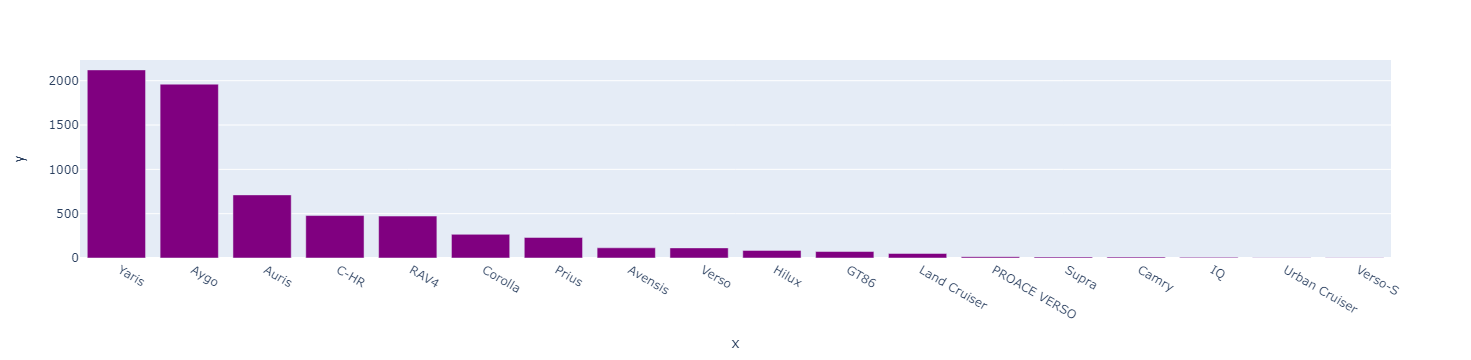

In [20]:
toyota_counts = df_toyota['model'].value_counts()
fig = px.bar(x=toyota_counts.index, y=toyota_counts.values,
            color_discrete_sequence=["purple"])
fig.show()

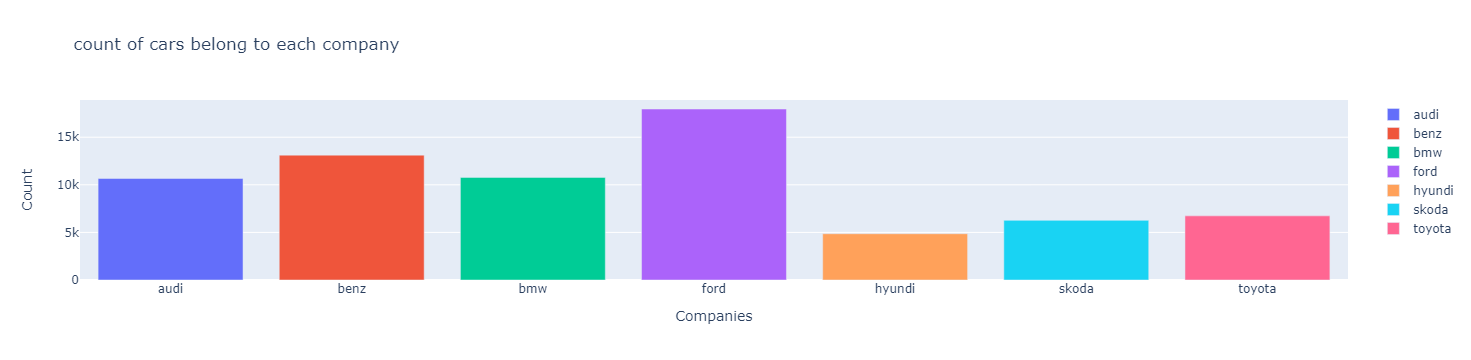

In [21]:
trace0 = go.Bar(
            x = data[data["company"]== 'audi']["company"].value_counts().index.values,
            y = data[data["company"]== 'audi']["company"].value_counts().values,
            name='audi'
    )

trace1 = go.Bar(
            x = data[data["company"]== 'benz']["company"].value_counts().index.values,
            y = data[data["company"]== 'benz']["company"].value_counts().values,
            name='benz'
    )

trace2 = go.Bar(
            x = data[data["company"]== 'bmw']["company"].value_counts().index.values,
            y = data[data["company"]== 'bmw']["company"].value_counts().values,
            name='bmw'
    )

trace3 = go.Bar(
            x = data[data["company"]== 'ford']["company"].value_counts().index.values,
            y = data[data["company"]== 'ford']["company"].value_counts().values,
            name='ford'
    )

trace4 = go.Bar(
            x = data[data["company"]== 'hyundi']["company"].value_counts().index.values,
            y = data[data["company"]== 'hyundi']["company"].value_counts().values,
            name='hyundi'
    )

trace5 = go.Bar(
            x = data[data["company"]== 'skoda']["company"].value_counts().index.values,
            y = data[data["company"]== 'skoda']["company"].value_counts().values,
            name='skoda'
    )

trace6 = go.Bar(
            x = data[data["company"]== 'toyota']["company"].value_counts().index.values,
            y = data[data["company"]== 'toyota']["company"].value_counts().values,
            name='toyota'
    )

plot_data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6]



layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Companies'
    ),
    title='count of cars belong to each company'
)

fig = go.Figure(data=plot_data, layout=layout)

py.iplot(fig, filename='grouped-bar')

<h4>Correlation between all features:</h4>
<p>I mentioned that I haven't used one_hot_encoding for some features like transmission or company name due to their type which is not numerical. you see that enginesize and year have the highest correlation rate with price.</p>

                year     price   mileage       tax       mpg  engineSize
year        1.000000  0.490829 -0.738604  0.195693 -0.132791   -0.038576
price       0.490829  1.000000 -0.417954  0.307648 -0.296429    0.638114
mileage    -0.738604 -0.417954  1.000000 -0.220761  0.185657    0.109073
tax         0.195693  0.307648 -0.220761  1.000000 -0.451451    0.278411
mpg        -0.132791 -0.296429  0.185657 -0.451451  1.000000   -0.248210
engineSize -0.038576  0.638114  0.109073  0.278411 -0.248210    1.000000


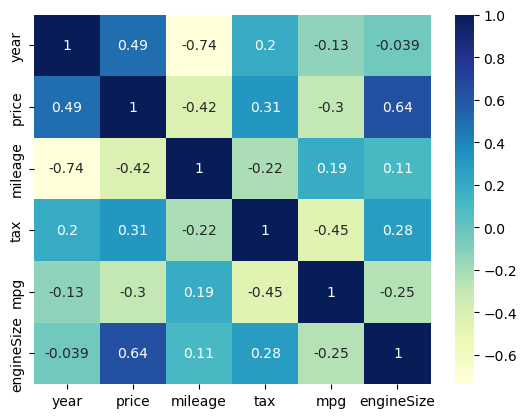

In [22]:
print(data.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

<h4>seaborn histplot for numerical features and scatterploteach color shows one of transmission types:</h4>


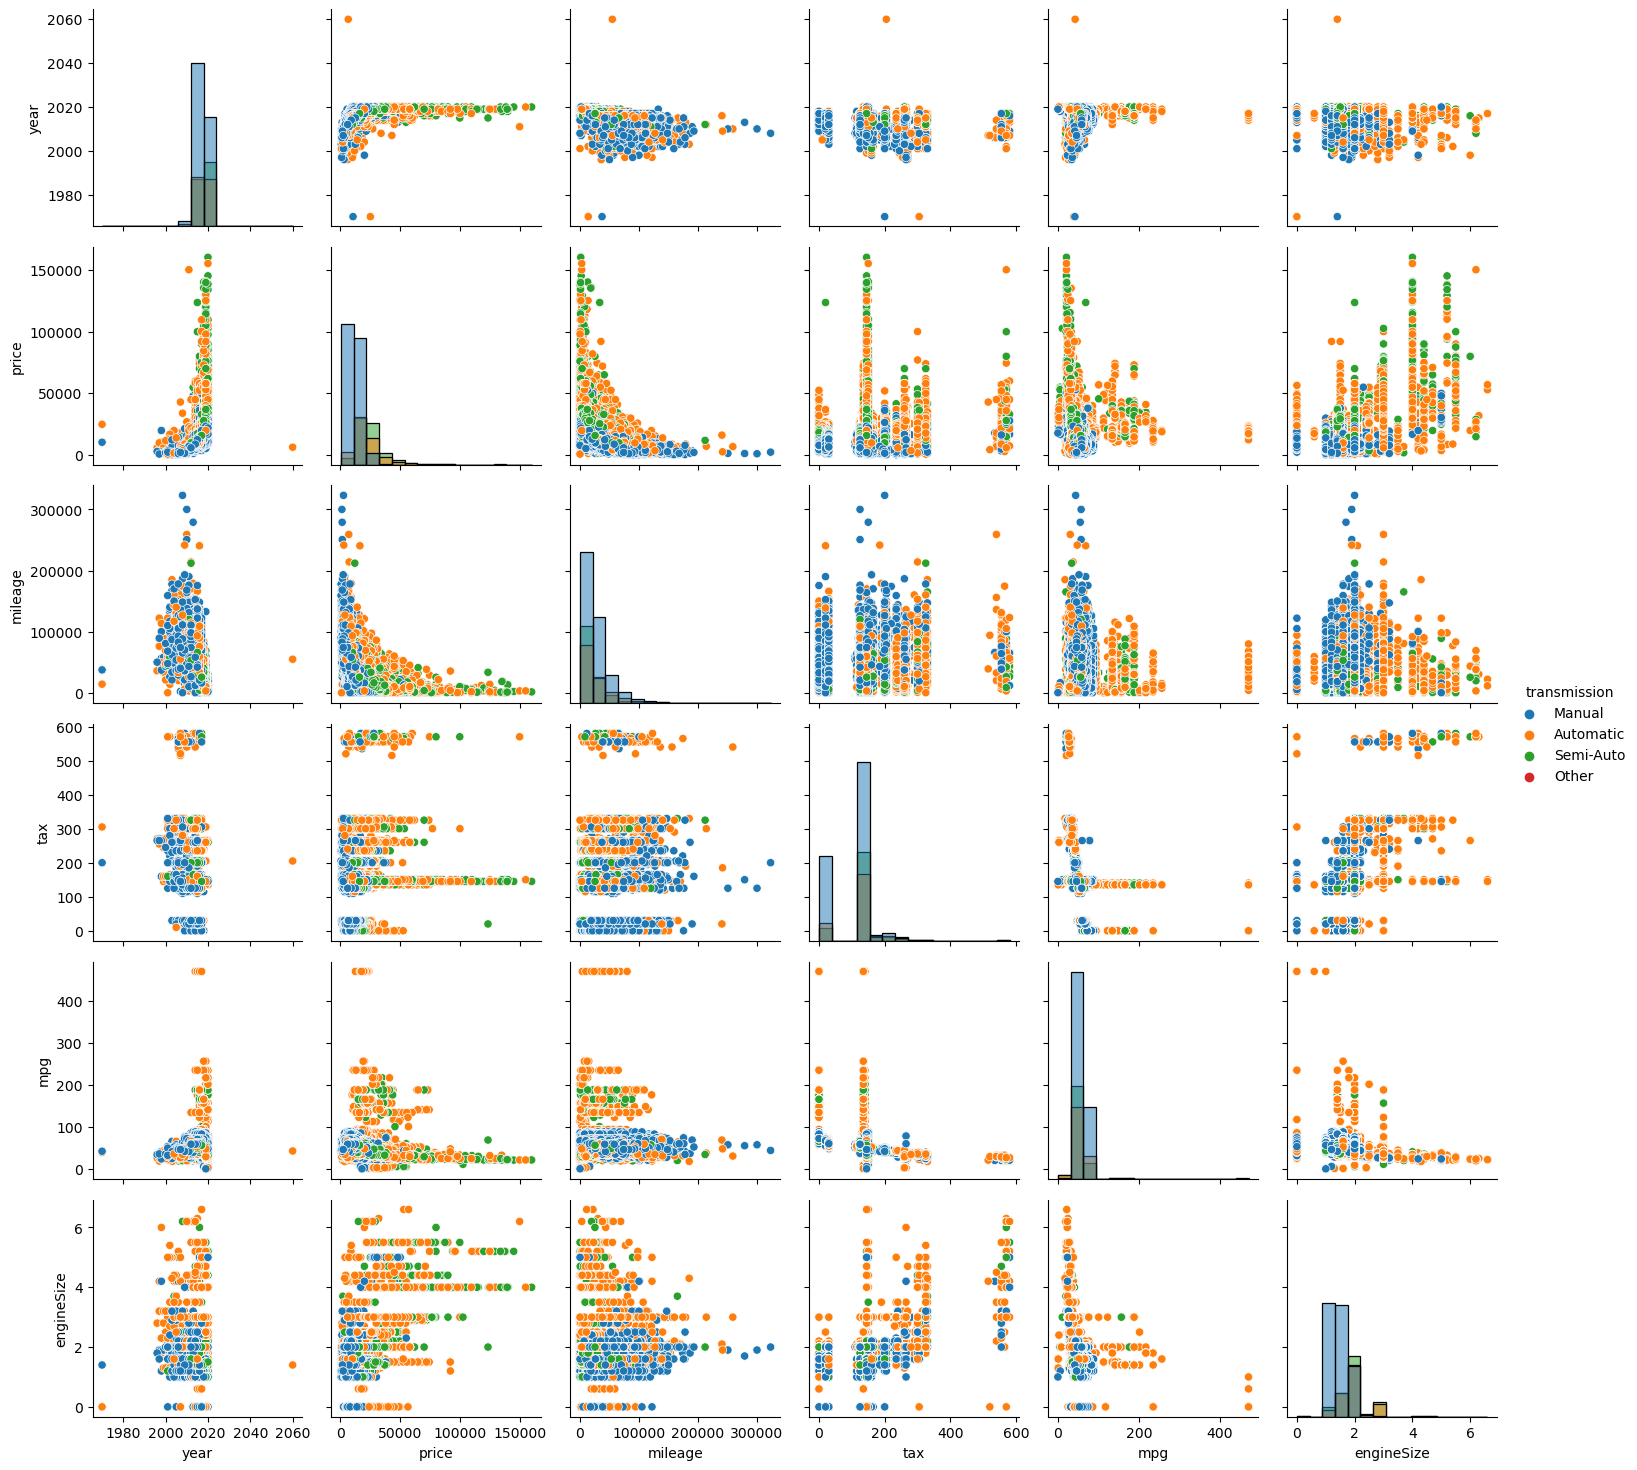

In [53]:
g = sns.PairGrid(data, hue="transmission")
g.map_diag(sns.histplot,bins = 15)
g.map_offdiag(sns.scatterplot)
g.add_legend()

<h4>Distribution of numerical features:</h4>
<p>Year and mpg are the only features which almostly follow normal distributions,price and mileage have skewness and distributions of tax and enginesize don't follow any specific distribution. </p>

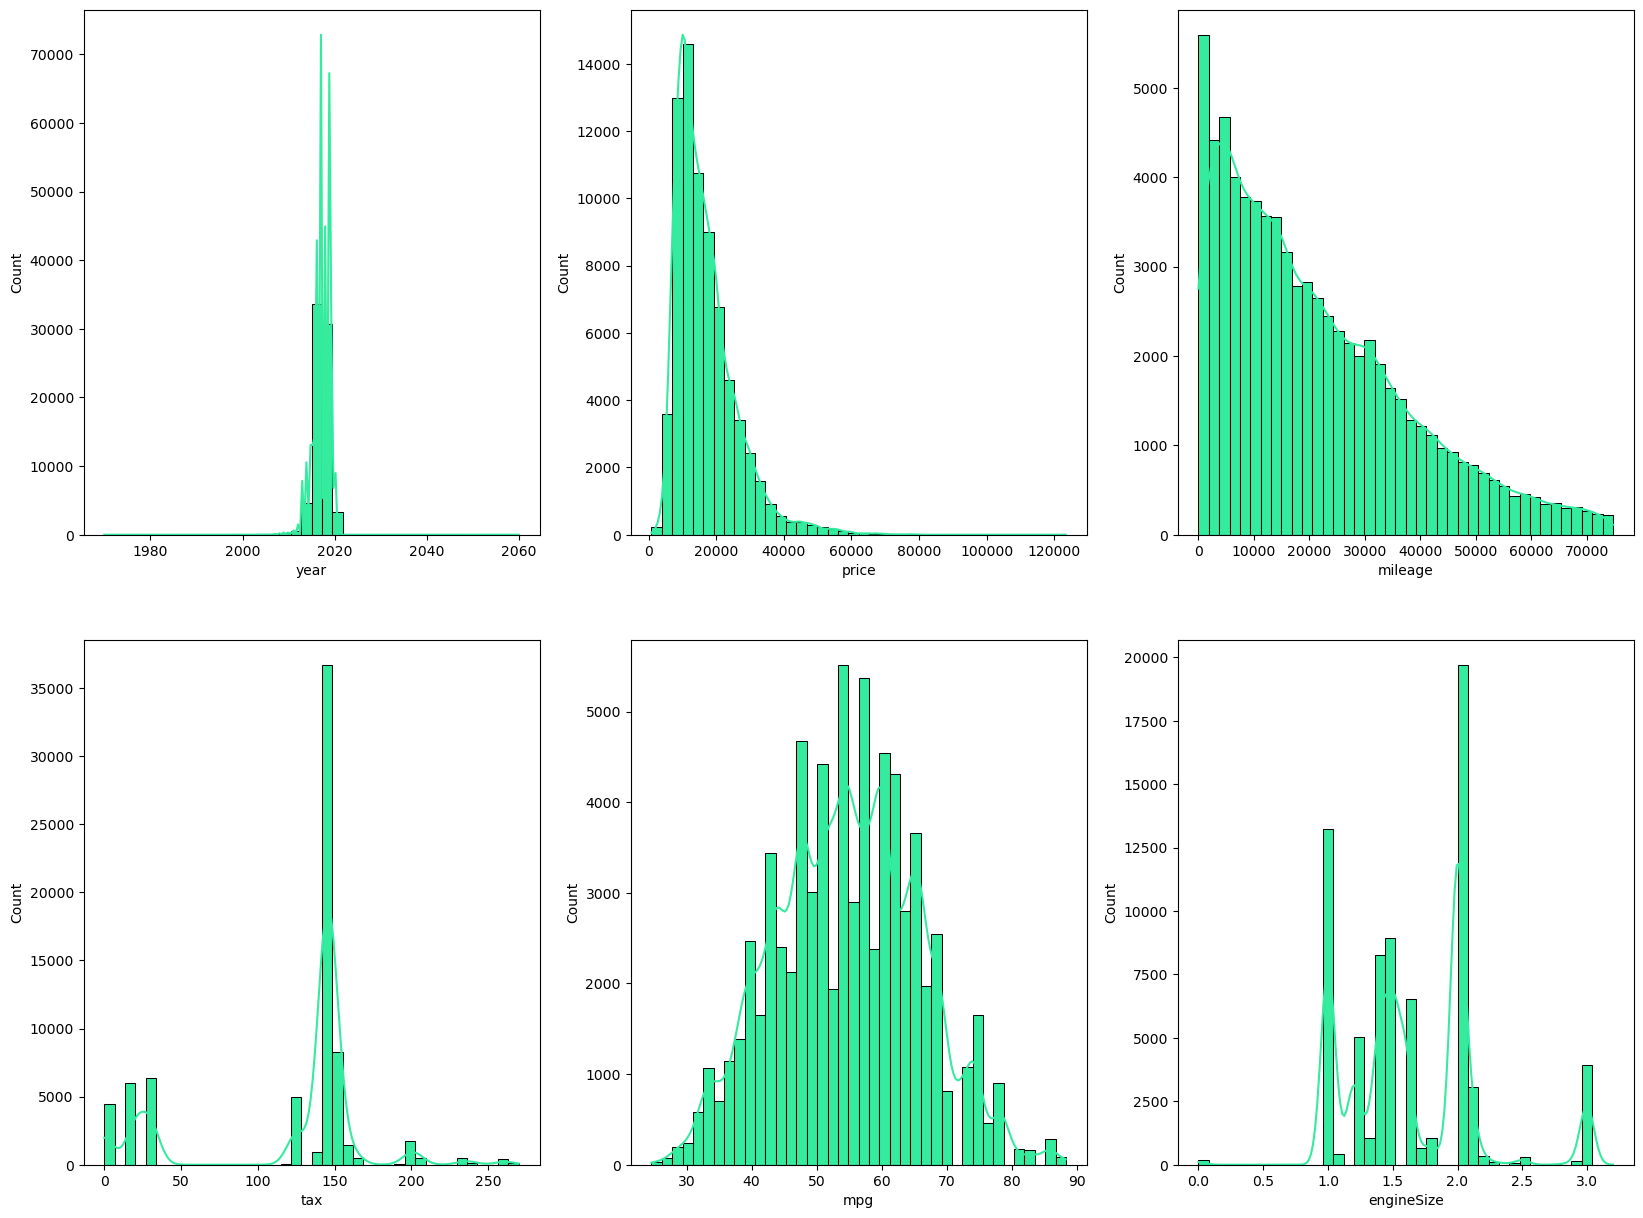

In [64]:
fig, axes = plt.subplots(2,3, figsize=(20, 15))
ax = axes.flatten()
i=0
for col in ['year','price','mileage','tax','mpg','engineSize']:
        sns.histplot(data[col], kde=True,ax=ax[i], alpha = 1.0 , color="#34eb9e",bins = 40)
        i = i+1
plt.show()

<h4>Detect and Delete Outliers:</h4>
<p>Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations. </p>

In [62]:
def outlier_treatment(datacolumn,coef):
   sorted(datacolumn)
   Q1,Q3 = np.percentile(datacolumn , [25,75])
   IQR = Q3-Q1
   lower_range = Q1 - (coef * IQR)
   upper_range = Q3 + (coef * IQR)
   return lower_range,upper_range

In [63]:
print("Previous Shape: ", data.shape)
for col in ['mileage','tax','mpg','engineSize']:
    if col == 'tax':
        coef = 6.5
    else:
        coef = 1.7
    lowerbound,upperbound = outlier_treatment(data[col],coef)
    data.drop(data[ (data[col] > upperbound) | (data[col] < lowerbound) ].index , inplace=True)
print("New Shape: ", data.shape)

Previous Shape:  (99187, 10)
New Shape:  (73160, 10)


<h4>OneHotEncoding:</h4>
<p>We can not do math operations on categorical data. We have to change them to numerical type. We done this with OneHotEncoding method: </p>

In [80]:
ce_OHE = ce.OneHotEncoder(cols=['company','fuelType','transmission'])

data1 = ce_OHE.fit_transform(data)
data1.head()

,model,year,price,transmission_1,transmission_2,transmission_3,transmission_4,mileage,fuelType_1,fuelType_2,...,engineSize,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9
1,A6,2016,16500,1,0,0,0,36203,1,0,...,2.0,1,0,0,0,0,0,0,0,0
9,A1,2016,12000,0,1,0,0,22451,0,1,...,1.4,1,0,0,0,0,0,0,0,0
14,A6,2015,15400,0,1,0,0,47348,1,0,...,2.0,1,0,0,0,0,0,0,0,0
15,A3,2017,14500,1,0,0,0,26156,0,1,...,1.4,1,0,0,0,0,0,0,0,0
17,A3,2014,13900,1,0,0,0,30516,0,1,...,1.4,1,0,0,0,0,0,0,0,0


In [66]:
data1

,model,year,price,transmission_1,transmission_2,transmission_3,transmission_4,mileage,fuelType_1,fuelType_2,...,engineSize,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9
1,A6,2016,16500,1,0,0,0,36203,1,0,...,2.0,1,0,0,0,0,0,0,0,0
9,A1,2016,12000,0,1,0,0,22451,0,1,...,1.4,1,0,0,0,0,0,0,0,0
14,A6,2015,15400,0,1,0,0,47348,1,0,...,2.0,1,0,0,0,0,0,0,0,0
15,A3,2017,14500,1,0,0,0,26156,0,1,...,1.4,1,0,0,0,0,0,0,0,0
17,A3,2014,13900,1,0,0,0,30516,0,1,...,1.4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15149,Eos,2015,12495,0,1,0,0,41850,1,0,...,2.0,0,0,0,0,0,0,0,0,1
15150,Eos,2014,8950,0,1,0,0,58000,1,0,...,2.0,0,0,0,0,0,0,0,0,1
15152,Eos,2012,5990,0,1,0,0,74000,1,0,...,2.0,0,0,0,0,0,0,0,0,1
15154,Fox,2009,1590,0,1,0,0,70000,0,1,...,1.4,0,0,0,0,0,0,0,0,1


<h5>The most numbers of our cars are for 2019.</h5>

In [70]:
data1['year'].value_counts().sort_values()


1970        1
1997        1
2060        1
2003        2
2000        2
1996        2
2001        2
1999        3
1998        4
2002        5
2004        7
2005       13
2006       14
2007       35
2008       45
2009       82
2010      113
2011      195
2012      347
2013     1764
2014     2898
2020     3321
2015     5521
2018    10405
2016    11779
2017    16365
2019    20233
Name: year, dtype: int64

<h4>Correlation matrix after oneHotEncoding:</h4>
<p>I have to pay attention to correlation between all features with our target(price). As correlation rate closes to 1 or -1 it means that this feature is important.</p>

<AxesSubplot:>

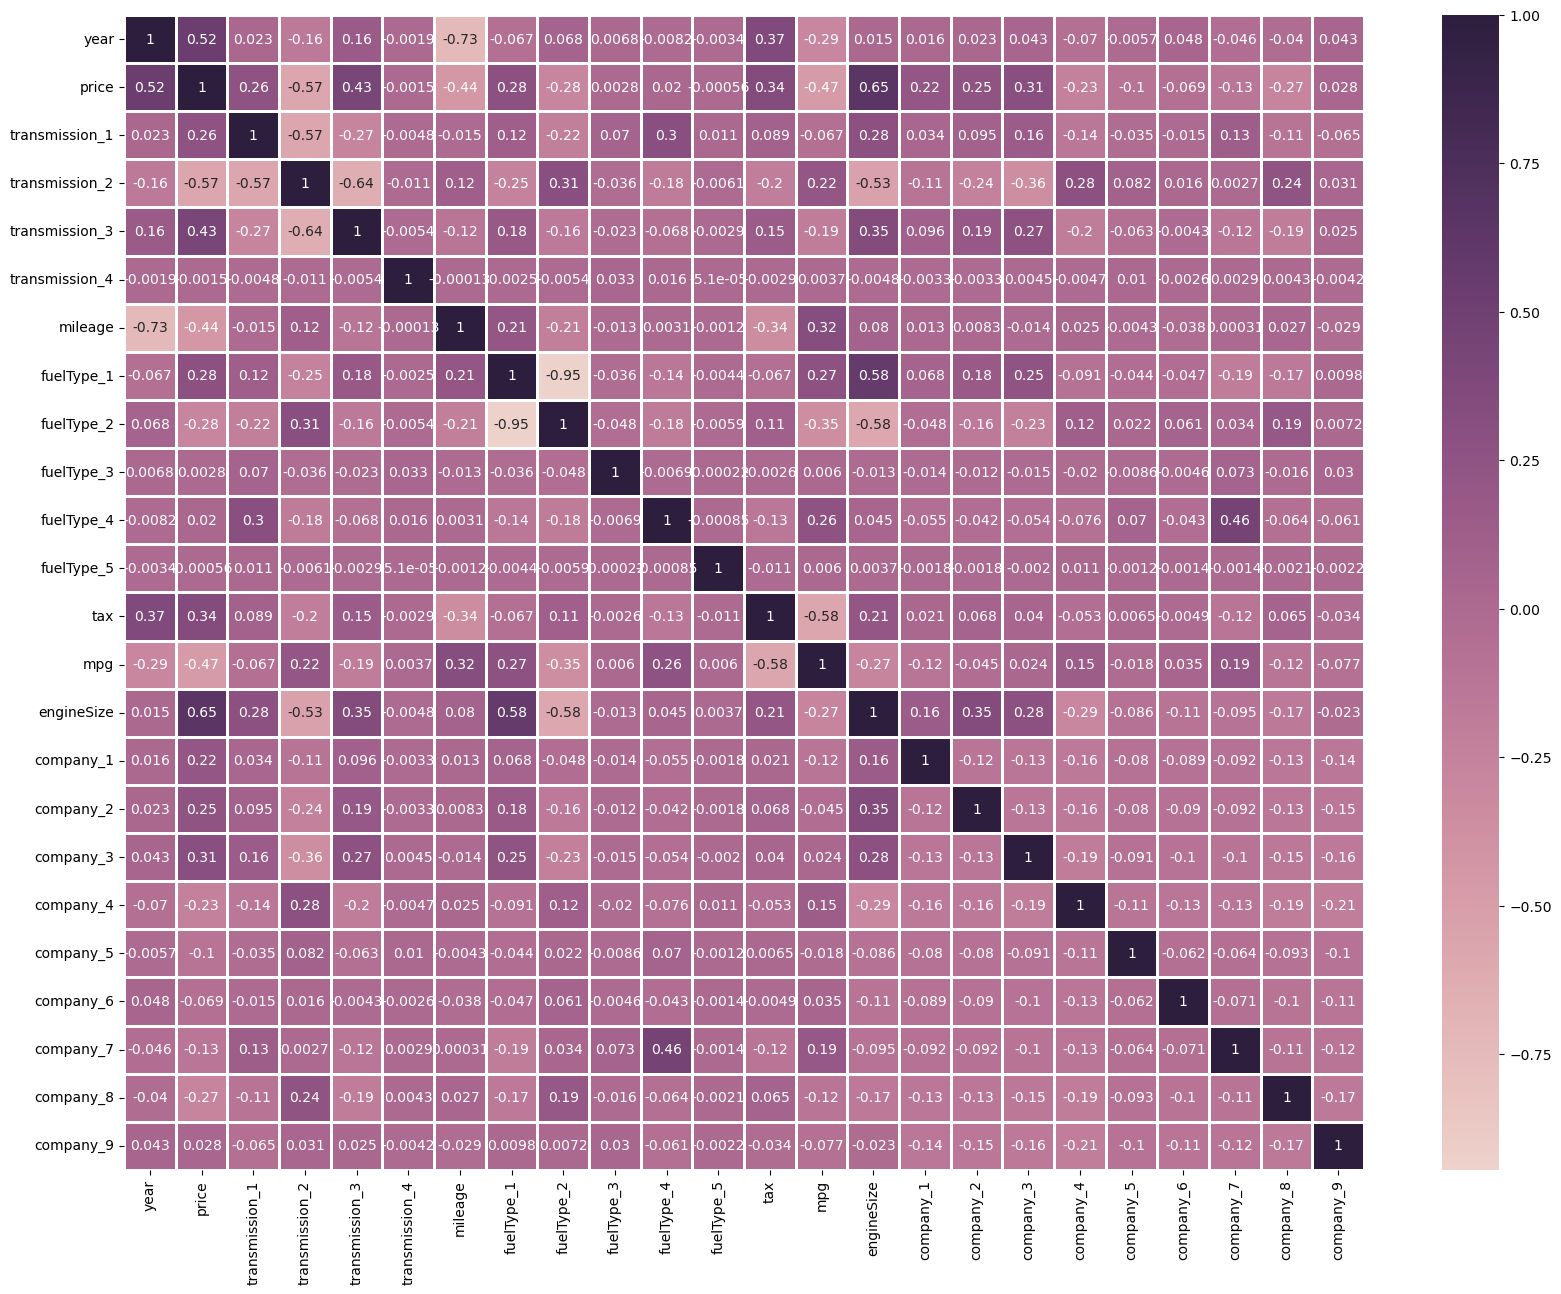

In [73]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(data1.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidths=2,ax=ax)

<h4>Dropping some features:</h4>
<p>According to our correlation matrix I dropped some features due to their rates were near to zero.</p>

In [81]:
data1.drop(['model','fuelType_3','fuelType_4','fuelType_5','transmission_1','transmission_4','company_1','company_5','company_6','company_7'],axis=1,inplace = True)

In [82]:
data1

,year,price,transmission_2,transmission_3,mileage,fuelType_1,fuelType_2,tax,mpg,engineSize,company_2,company_3,company_4,company_8,company_9
1,2016,16500,0,0,36203,1,0,20,64.2,2.0,0,0,0,0,0
9,2016,12000,1,0,22451,0,1,30,55.4,1.4,0,0,0,0,0
14,2015,15400,1,0,47348,1,0,30,61.4,2.0,0,0,0,0,0
15,2017,14500,0,0,26156,0,1,145,58.9,1.4,0,0,0,0,0
17,2014,13900,0,0,30516,0,1,30,56.5,1.4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15149,2015,12495,1,0,41850,1,0,125,58.9,2.0,0,0,0,0,1
15150,2014,8950,1,0,58000,1,0,125,58.9,2.0,0,0,0,0,1
15152,2012,5990,1,0,74000,1,0,125,58.9,2.0,0,0,0,0,1
15154,2009,1590,1,0,70000,0,1,200,42.0,1.4,0,0,0,0,1


In [83]:
price = data1.pop('price')
data1.insert(14,'price',price)

In [84]:
data1

,year,transmission_2,transmission_3,mileage,fuelType_1,fuelType_2,tax,mpg,engineSize,company_2,company_3,company_4,company_8,company_9,price
1,2016,0,0,36203,1,0,20,64.2,2.0,0,0,0,0,0,16500
9,2016,1,0,22451,0,1,30,55.4,1.4,0,0,0,0,0,12000
14,2015,1,0,47348,1,0,30,61.4,2.0,0,0,0,0,0,15400
15,2017,0,0,26156,0,1,145,58.9,1.4,0,0,0,0,0,14500
17,2014,0,0,30516,0,1,30,56.5,1.4,0,0,0,0,0,13900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15149,2015,1,0,41850,1,0,125,58.9,2.0,0,0,0,0,1,12495
15150,2014,1,0,58000,1,0,125,58.9,2.0,0,0,0,0,1,8950
15152,2012,1,0,74000,1,0,125,58.9,2.0,0,0,0,0,1,5990
15154,2009,1,0,70000,0,1,200,42.0,1.4,0,0,0,0,1,1590


<h4>Shuffling Dataset:</h4>
<p>Shuffling data serves the purpose of reducing variance and making sure that models remain general and overfit less.

The obvious case where you'd shuffle your data is if your data is sorted by their class/target. Here, you will want to shuffle to make sure that your training/test/validation sets are representative of the overall distribution of the data.</p>

In [85]:
data1 = data1.sample(frac = 1)

In [86]:
data1

,year,transmission_2,transmission_3,mileage,fuelType_1,fuelType_2,tax,mpg,engineSize,company_2,company_3,company_4,company_8,company_9,price
4672,2019,0,1,3525,0,1,145,32.1,2.0,0,0,0,0,0,44033
4475,2016,1,0,20604,0,1,0,69.0,1.0,0,0,0,0,0,7532
10984,2017,1,0,56907,0,1,145,47.1,1.4,0,0,0,1,0,6094
4450,2017,0,0,24749,1,0,145,50.4,2.0,1,0,0,0,0,28980
13253,2015,1,0,27514,0,1,30,54.3,1.2,0,0,1,0,0,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,2019,0,0,9909,0,0,150,34.5,3.0,0,0,0,0,0,59995
7221,2017,0,1,7100,0,1,145,52.3,1.6,0,1,0,0,0,18749
7665,2018,0,1,7575,1,0,145,65.7,1.5,0,1,0,0,0,20000
8980,2016,1,0,30000,0,1,0,67.3,1.0,0,0,0,0,0,9999


<h4>Scaling Dataset:</h4>
<p>The choice of using normalization or standardization will depend on our problem and the machine learning algorithm we are using. There is no hard and fast rule to tell us when to normalize or standardize our data. We can always start by fitting our model to raw, normalized, and standardized data and comparing the performance for the best results.</p>

In [87]:
scaler = MinMaxScaler()
cols_to_norm = ["mileage","tax","engineSize"]
data1[cols_to_norm] = scaler.fit_transform(data1[cols_to_norm])


In [88]:
std_scaler = StandardScaler()
cols_to_std = ["year","mpg"]
data1[cols_to_std] = scaler.fit_transform(data1[cols_to_std])

In [89]:
data1

,year,transmission_2,transmission_3,mileage,fuelType_1,fuelType_2,tax,mpg,engineSize,company_2,company_3,company_4,company_8,company_9,price
4672,0.544444,0,1,0.047193,0,1,0.537037,0.117739,0.62500,0,0,0,0,0,44033
4475,0.511111,1,0,0.275913,0,1,0.000000,0.697017,0.31250,0,0,0,0,0,7532
10984,0.522222,1,0,0.762079,0,1,0.537037,0.353218,0.43750,0,0,0,1,0,6094
4450,0.522222,0,0,0.331423,1,0,0.537037,0.405024,0.62500,1,0,0,0,0,28980
13253,0.500000,1,0,0.368451,0,1,0.111111,0.466248,0.37500,0,0,1,0,0,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,0.544444,0,0,0.132687,0,0,0.555556,0.155416,0.93750,0,0,0,0,0,59995
7221,0.522222,0,1,0.095069,0,1,0.537037,0.434851,0.50000,0,1,0,0,0,18749
7665,0.533333,0,1,0.101430,1,0,0.537037,0.645212,0.46875,0,1,0,0,0,20000
8980,0.511111,1,0,0.401744,0,1,0.000000,0.670330,0.31250,0,0,0,0,0,9999


<h4>train_valid_test_split</h4>
<p>Definition of Train-Valid-Test Split
Train-Valid-Test split is a technique to evaluate the performance of your machine learning model — classification or regression alike. You take a given dataset and divide it into three subsets. A brief description of the role of each of these datasets is below.

[Train Dataset]-->
Set of data used for learning (by the model), that is, to fit the parameters to the machine learning model.
[Valid Dataset]-->
Set of data used to provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters.
Also play a role in other forms of model preparation, such as feature selection, threshold cut-off selection.
[Test Dataset]-->
Set of data used to provide an unbiased evaluation of a final model fitted on the training dataset.</p>

In [90]:
from fast_ml.model_development import train_valid_test_split

In [91]:
x_train, y_train,x_valid, y_valid,x_test, y_test = train_valid_test_split(data1,
                                                                         target = 'price', 
                                                                         train_size=0.6,
                                                                         valid_size=0.2,
                                                                         test_size=0.2,
                                                                         random_state=0)

In [92]:
print(y_train.shape)
print(y_valid.shape)
print(x_test.shape)

(43896,)
(14632,)
(14632, 14)


<h4>Importing some regression algorithms:</h4>

In [94]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet,RANSACRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [95]:
regressors = [
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    
]

<h4>You can see the result of using 6 various regression models in below:</h4>
<p>With ExtraTreesRegressor,RandomForestRegressor and DecisionTreeRegressor I've reached a high variance score but my models were overfitted because the score of train was better than test(about 6%).With linearregression,Lasso and Ridge I've reached 80% of variance score but none of them was overfitted!</p>

In [96]:
head = 7
for model in regressors[:head]:
    model.fit(x_train, y_train)
    y_pred_valid = model.predict(x_valid)  
    y_pred_train = model.predict(x_train)
    print(model)
    print("\tExplained variance train:", explained_variance_score(y_train, y_pred_train))
    print("\tExplained variance valid:", explained_variance_score(y_valid, y_pred_valid))
    print("\tMean absolute error:", mean_absolute_error(y_valid, y_pred_valid))
    print('\tMean Squared Error:', mean_squared_error(y_valid, y_pred_valid))
    print("\tR2 score:", r2_score(y_valid, y_pred_valid))
    print()

ExtraTreesRegressor()
	Explained variance train: 0.9992863792764469
	Explained variance valid: 0.9353416256661916
	Mean absolute error: 1446.0618839900308
	Mean Squared Error: 5383115.157664876
	R2 score: 0.9353389989556392

RandomForestRegressor()
	Explained variance train: 0.9905996458774058
	Explained variance valid: 0.9387444638355905
	Mean absolute error: 1416.0464454242122
	Mean Squared Error: 5099814.085844716
	R2 score: 0.9387419599483553

DecisionTreeRegressor()
	Explained variance train: 0.9992865310621827
	Explained variance valid: 0.9052071358189064
	Mean absolute error: 1751.9507133734376
	Mean Squared Error: 7891916.944068014
	R2 score: 0.9052037278014035

LinearRegression()
	Explained variance train: 0.7996054203890561
	Explained variance valid: 0.8001047568514238
	Mean absolute error: 2880.133555574807
	Mean Squared Error: 16642176.858180685
	R2 score: 0.8000971958262814

Lasso()
	Explained variance train: 0.7995376270438106
	Explained variance valid: 0.7999843128422603

<h3>Xgboost is Magician!!!!</h3>
<p>
Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

Shortly after its development and initial release, XGBoost became the go-to method and often the key component in winning solutions for a range of problems in machine learning competitions.
I've reached 92% variance score for both train and validation set and there is no overfitting.     
</p>

In [97]:
import xgboost 

In [98]:
xgb_reg = xgboost.XGBRegressor(max_depth=7, n_estimators=200, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.02,feature_fraction=0.7, 
                                  scale_pos_weight=1.8)

# Train the model with train data sets
xgb_reg.fit(x_train, y_train)
y_pred_valid = xgb_reg.predict(x_valid)  
y_pred_train = xgb_reg.predict(x_train)

print("\tExplained variance train:", explained_variance_score(y_train, y_pred_train))
print("\tExplained variance valid:", explained_variance_score(y_valid, y_pred_valid))
print("\tMean absolute error:", mean_absolute_error(y_valid, y_pred_valid))
print('\tMean Squared Error:', mean_squared_error(y_valid, y_pred_valid))
print("\tR2 score:", r2_score(y_valid, y_pred_valid))

[16:57:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "feature_fraction", "objectvie" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


	Explained variance train: 0.9268141570543879
	Explained variance valid: 0.9228099581666381
	Mean absolute error: 1736.1733545769494
	Mean Squared Error: 6512995.574316773
	R2 score: 0.9217670807147478


[16:57:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "feature_fraction", "objectvie" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


>1, train: -1.316, test: -1.282
[16:57:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "feature_fraction", "objectvie" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


>2, train: -0.165, test: -0.152
[16:57:51] WARNING: C:\Win

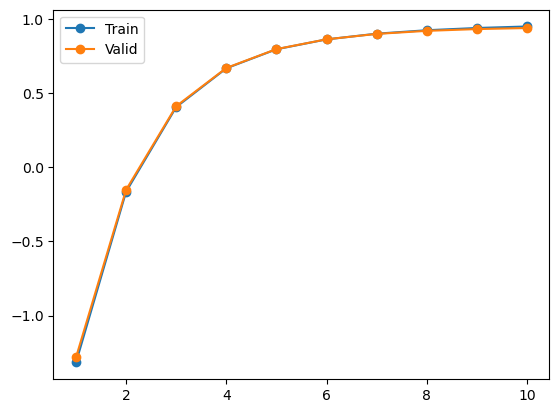

In [99]:
train_scores, valid_scores = list(), list()
values = [i for i in range(1, 11)]

for i in values:

    model = xgboost.XGBRegressor(max_depth=i, n_estimators=i*20, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           min_child_weight=6,gamma=0.5,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.01
                           ,random_state=42, learning_rate=0.02,feature_fraction=0.1*i, 
                                  scale_pos_weight=0.2*i,eval_metric='mlogloss')

    model.fit(x_train, y_train)

    train_yhat = model.predict(x_train)
    train_r2_score = r2_score(y_train, train_yhat)
    train_scores.append(train_r2_score)

    valid_yhat = model.predict(x_valid)
    valid_r2_score = r2_score(y_valid, valid_yhat)
    valid_scores.append(valid_r2_score)
 
    print('>%d, train: %.3f, test: %.3f' % (i, train_r2_score, valid_r2_score))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, valid_scores, '-o', label='Valid')
plt.legend()
plt.show()